<a href="https://colab.research.google.com/github/RashmitVartak/DAV/blob/main/DAV_Exp2_63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment - 2:Simple Linear Regression in Python**


Name:Rashmit Vartak

Div: D11AD

Rollno:63


**Title of Experiment**:Simple Linear Regression in Python

**Outcome of Experiment :**
Implement various Regression techniques for prediction. (LO2)

**Theory :**


#Python

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
#reduction of the columns according to our need for the expirement
df = df[["TV", "Sales"]]
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [12]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


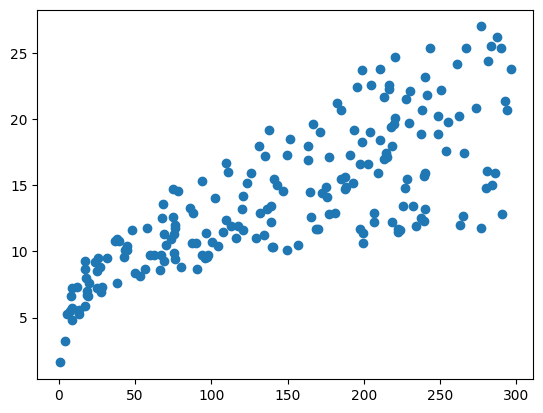

In [15]:
plt.scatter(df['TV'], df['Sales'])

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

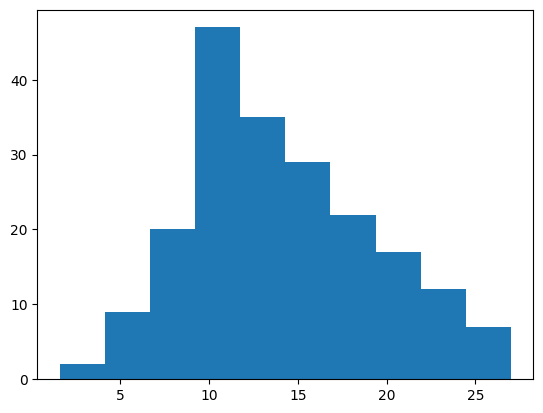

In [17]:
plt.hist(df["Sales"])

In [18]:
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [19]:
df.isnull().any(axis=0)

TV       False
Sales    False
dtype: bool

In [20]:
model = LinearRegression()
model.fit(df["TV"].values.reshape(-1, 1), df["Sales"])

LinearRegression()

Text(0.01, 0.9, 'y = 7.033 + 0.048 * x')

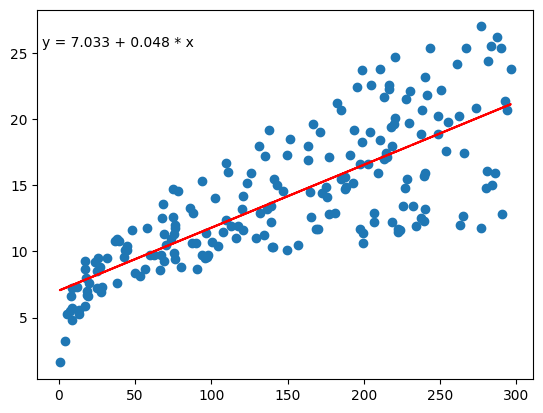

In [23]:
y_pred = model.predict(df["TV"].values.reshape(-1, 1))
plt.scatter(df['TV'], df['Sales'])
plt.plot(df["TV"], y_pred, color="Red")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

#R

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("Advertising.csv")

In [4]:
df = select(df,c("TV", "Sales"))
head(df)

,TV,Sales
,<dbl>,<dbl>
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
6,8.7,7.2


In [5]:
summary(df)


       TV             Sales      
 Min.   :  0.70   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.:10.38  
 Median :149.75   Median :12.90  
 Mean   :147.04   Mean   :14.02  
 3rd Qu.:218.82   3rd Qu.:17.40  
 Max.   :296.40   Max.   :27.00  

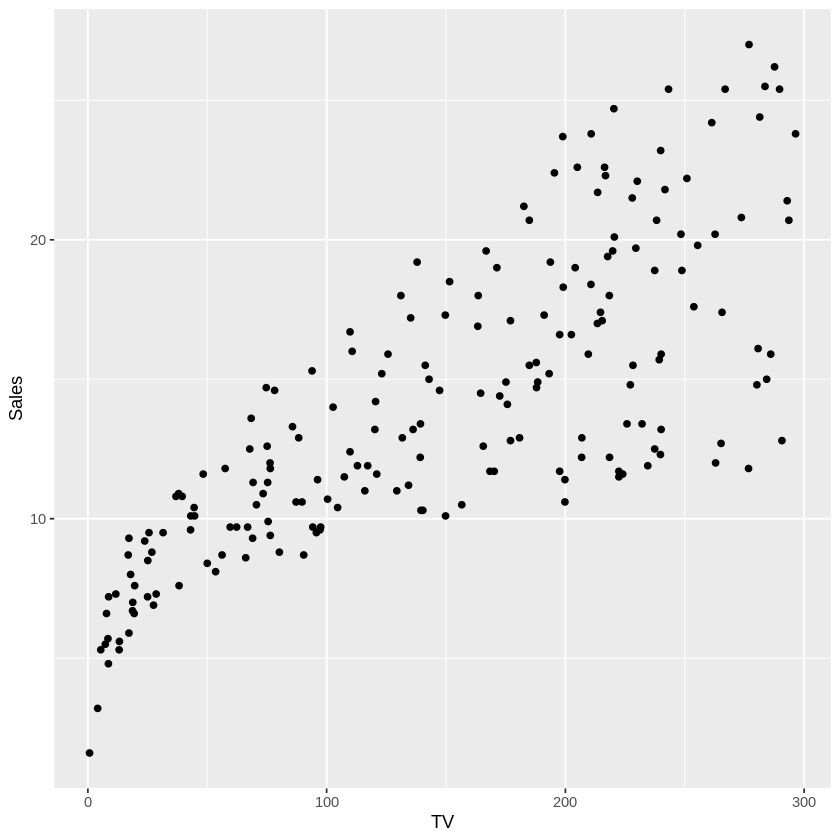

In [6]:
ggplot(df, aes(x=TV, y=Sales)) +
    geom_point()

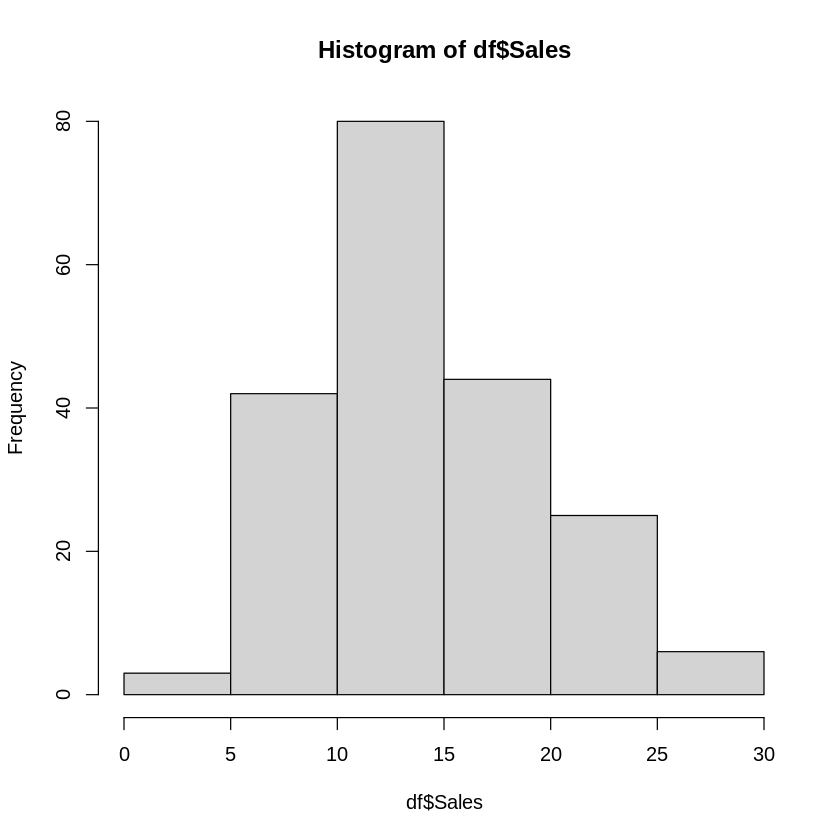

In [8]:
hist(df$Sales)

In [9]:
model = lm(Sales ~ TV, data=df)
summary(model)


Call:
lm(formula = Sales ~ TV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [10]:
pred <- predict(model, data = df$Sales)

[1] "y = 7.032594 + 0.047537 * x"

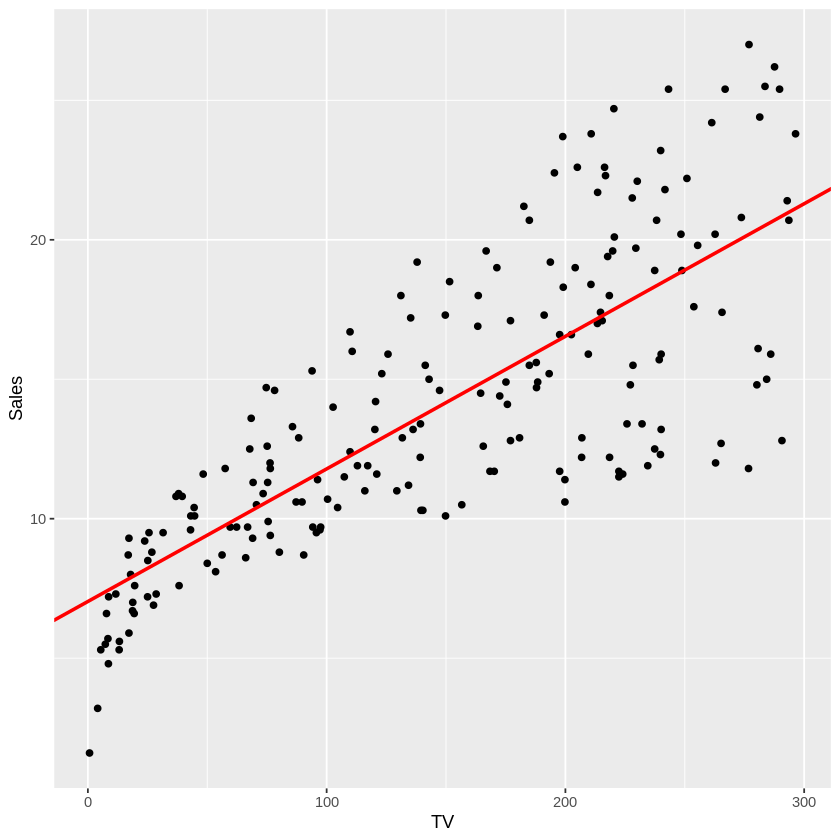

In [11]:
ggplot(df, aes(x=TV, y=Sales)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="Red",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])